Data Source : https://www.kaggle.com/vikasukani/diabetes-data-set?select=diabetes-dataset.csv

#### Let's import Library

In [17]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

#### Let's read the data

In [2]:
data = pd.read_csv('diabetes-dataset.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [3]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [5]:
data['Outcome'].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

0 indicates, human is not having diabetes and 1 indicates,human is having diabetes

#### Data Cleaning

There are some factors where values are zero, Glucose values,for example,cannot be 0 for a human,Similarly,Blood Pressure,
Skin Thickness, Insulin and BMI can not be zero for a human

In [6]:
non_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for coloumn in non_zero:
    data[coloumn] = data[coloumn].replace(0,np.NaN)
    mean = int(data[coloumn].mean(skipna = True))
    data[coloumn] = data[coloumn].replace(np.NaN, mean)
    print(data[coloumn])

0       138.0
1        84.0
2       145.0
3       135.0
4       139.0
        ...  
1995     75.0
1996    179.0
1997     85.0
1998    129.0
1999     81.0
Name: Glucose, Length: 2000, dtype: float64
0        62.0
1        82.0
2        72.0
3        68.0
4        62.0
        ...  
1995     64.0
1996     72.0
1997     78.0
1998    110.0
1999     72.0
Name: BloodPressure, Length: 2000, dtype: float64
0       35.0
1       31.0
2       29.0
3       42.0
4       41.0
        ... 
1995    24.0
1996    42.0
1997    29.0
1998    46.0
1999    15.0
Name: SkinThickness, Length: 2000, dtype: float64
0       153.0
1       125.0
2       153.0
3       250.0
4       480.0
        ...  
1995     55.0
1996    130.0
1997    153.0
1998    130.0
1999     76.0
Name: Insulin, Length: 2000, dtype: float64
0       33.6
1       38.2
2       44.2
3       42.3
4       40.7
        ... 
1995    29.7
1996    32.7
1997    31.2
1998    67.1
1999    30.1
Name: BMI, Length: 2000, dtype: float64


Observation : We have replaced the zero value with NaN and Nan value mean of cloumn

#### Data Visiualization

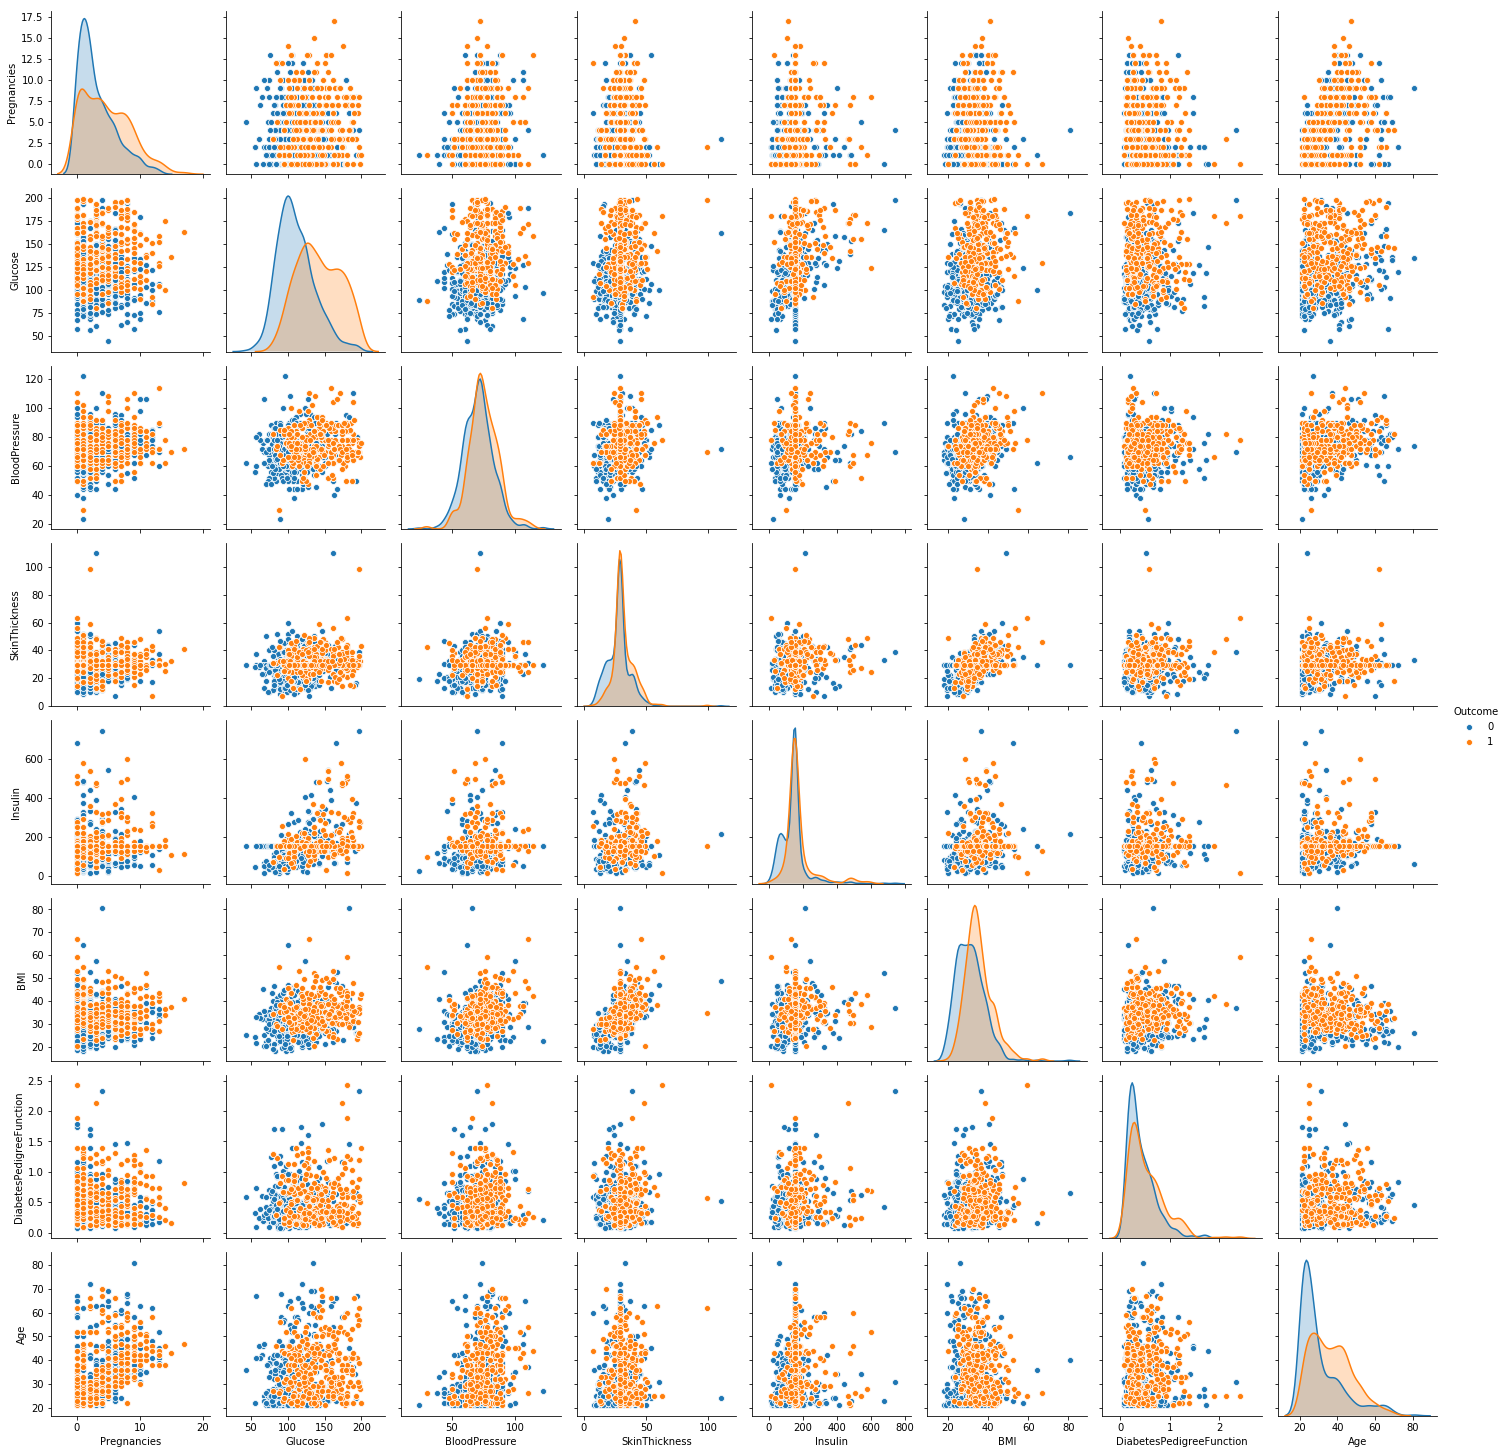

In [7]:
sns.pairplot(data,hue='Outcome')

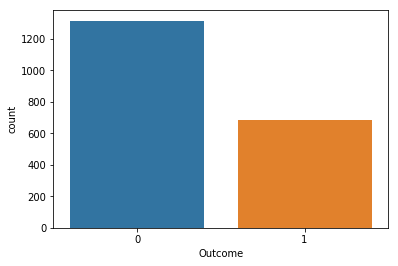

In [8]:
sns.countplot(x='Outcome',data= data)

#### Taining Model

In [18]:
X = data.iloc[:,0:8]
Y = data.iloc[:,8]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y)

In [19]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1337,5,130.0,82.0,29.0,153.0,39.1,0.956,37
423,2,115.0,64.0,22.0,153.0,30.8,0.421,21
1665,1,143.0,84.0,23.0,310.0,42.4,1.076,22
1796,9,164.0,78.0,29.0,153.0,32.8,0.148,45
105,1,126.0,56.0,29.0,152.0,28.7,0.801,21


In [20]:
x_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1980,17,163.0,72.0,41.0,114.0,40.9,0.817,47
197,3,107.0,62.0,13.0,48.0,22.9,0.678,23
1215,1,106.0,76.0,29.0,153.0,37.5,0.197,26
328,2,102.0,86.0,36.0,120.0,45.5,0.127,23
1915,2,142.0,82.0,18.0,64.0,24.7,0.761,21


In [21]:
y_train.head()

1337    1
423     0
1665    0
1796    1
105     0
Name: Outcome, dtype: int64

In [22]:
y_test.head()

1980    1
197     1
1215    0
328     1
1915    0
Name: Outcome, dtype: int64

In [23]:
import math
math.sqrt(len(y_test))

20.0

We will take k values as odd because if it will be even it will create confusion between 2 classes

In [26]:
classifier = KNeighborsClassifier(n_neighbors=21,metric = 'euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=21)

In [28]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,

#### Confustion Matrix

In [29]:
cm = confusion_matrix(y_test,y_pred)
cm


array([[214,  49],
       [ 43,  94]], dtype=int64)

In [31]:
print("f1 score:",f1_score(y_test,y_pred))

f1 score: 0.6714285714285714


In [32]:
print(accuracy_score(y_test,y_pred))

0.77
